In [ ]:
!wget  http://104.197.136.14/ds/2016.04/2016.04C.multisnr.pkl.bz2 
  
!pip install -U -q PyDrive
import os
from os import chdir, listdir, stat
from sys import exit
import ast
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from pydrive.files import GoogleDriveFileList
import googleapiclient.errors


auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

local_download_path = os.path.expanduser('~/data')
try:
  os.makedirs(local_download_path)
except: pass

def upload_files(drive, folder_id, src_files, src_folder_name='.'):
    try:
        chdir(src_folder_name)
    except OSError:
        print(src_folder_name + ' is missing')
    for file1 in listdir('.'):
        statinfo = stat(file1)
        if file1 in src_files and statinfo.st_size > 0:
            print('Uploading ' + file1)
            f = drive.CreateFile(
                {"parents": [{"kind": "drive#fileLink", "id": folder_id}]})
            f.SetContentFile(file1)
            f.Upload()

def load_files(list_files):
  file_list = drive.ListFile(
    {'q': "'1qb0YDMG1Ck0PkZrBsTaVStG5JNebpy8v' in parents"}).GetList()

  for f in file_list:
    if f['title'] in list_files:
      print('title: %s, id: %s' % (f['title'], f['id']))
      fname = os.path.join(local_download_path, f['title'])
      print('downloading to {}'.format(fname))
      f_ = drive.CreateFile({'id': f['id']})
      f_.GetContentFile(fname)  


!bzip2 -d ./2016.04C.multisnr.pkl.bz2

In [ ]:
import _pickle
import numpy as np
with open ('./2016.04C.multisnr.pkl','rb') as f:
  data=_pickle.load(f, encoding="latin1")
accuracies=[15.01 ,14.33 ,16.2 ,19.01 ,18.99 ,20.13 ,18.45 ,25.45 ,50.3 ,67.7 ,70.6 ,74.35 ,82.00 ,83.34 ,79.55 ,77.34 ,85.33 ,82.45 ,83.2 ,85.11]

In [ ]:
#reads the data set's keys 
mods,snrs = map(lambda j: sorted(list(set(map(lambda x: x[j], data.keys())))), [0,1])
  

In [ ]:
formatedData=[]
labels=[]
for mod in mods:
  for snr in snrs:
    formatedData.append(data[(mod,snr)])
    for i in range(data[(mod,snr)].shape[0]):
            
            labels.append((mod,snr))
formatedData = np.vstack(formatedData)


print ("Dataset formatted into shape: ",formatedData.shape)

print ("Dataset with SNRs: ",snrs)
print ("Dataset with Modulations: ",mods)
print ("Data prepared")
print (labels)

Dataset formatted into shape:  (162060, 2, 128)
Dataset with SNRs:  [-20, -18, -16, -14, -12, -10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10, 12, 14, 16, 18]
Dataset with Modulations:  ['8PSK', 'AM-DSB', 'AM-SSB', 'BPSK', 'CPFSK', 'GFSK', 'PAM4', 'QAM16', 'QAM64', 'QPSK', 'WBFM']
Data prepared
[('8PSK', -20), ('8PSK', -20), ('8PSK', -20), ('8PSK', -20), ('8PSK', -20), ('8PSK', -20), ('8PSK', -20), ('8PSK', -20), ('8PSK', -20), ('8PSK', -20), ('8PSK', -20), ('8PSK', -20), ('8PSK', -20), ('8PSK', -20), ('8PSK', -20), ('8PSK', -20), ('8PSK', -20), ('8PSK', -20), ('8PSK', -20), ('8PSK', -20), ('8PSK', -20), ('8PSK', -20), ('8PSK', -20), ('8PSK', -20), ('8PSK', -20), ('8PSK', -20), ('8PSK', -20), ('8PSK', -20), ('8PSK', -20), ('8PSK', -20), ('8PSK', -20), ('8PSK', -20), ('8PSK', -20), ('8PSK', -20), ('8PSK', -20), ('8PSK', -20), ('8PSK', -20), ('8PSK', -20), ('8PSK', -20), ('8PSK', -20), ('8PSK', -20), ('8PSK', -20), ('8PSK', -20), ('8PSK', -20), ('8PSK', -20), ('8PSK', -20), ('8PSK', -20), ('8PSK'

In [ ]:
np.random.seed(2018)
n_examples = formatedData.shape[0]
'''n_train = int(n_examples * 0.9)
train_idx = np.random.choice(range(0,n_examples), size=n_train, replace=False)
test_idx = list(set(range(0,n_examples))-set(train_idx))'''
train_idx = []
test_idx = []
validation_idx = []
labels_train=[]
labels_test=[]
labels_test2 = []
labels_test3 = []
labels_validation=[]
formatedData_train = []
formatedData_test = []
formatedData_validation = []
label = []
for label in data.keys():
  current_data = data[label]
  size = current_data.shape[0]
  for i in range(0,int(0.9*size)):
    formatedData_train.append([current_data[i]])
    labels_train.append(label[0])
  for i in range(int(0.9*size) , int(0.95*size) ):
    formatedData_test.append([current_data[i]])
    labels_test.append(label[0])
    labels_test2.append(label)
    labels_test3.append(label[1])
    test_idx.append(i)
  for i in range(int(0.95*size) , size ):
    formatedData_validation.append([current_data[i]])
    labels_validation.append(label[0])
    
formatedData_train = np.vstack(formatedData_train)
formatedData_test = np.vstack(formatedData_test)
formatedData_validation = np.vstack(formatedData_validation)
print (formatedData_train.shape)
print (formatedData_test.shape)
print (formatedData_validation.shape)
print(len(labels_test))
print(len(labels_train))
print(len(labels_validation))
'''def to_onehot(yy):
    yy1 = np.zeros([len(list(yy)), max(yy)+1])
    yy1[np.arange(len(yy)),yy] = 1
    return yy1

Y_train = to_onehot(map(lambda x: mods.index(labels[x][0]), train_idx))
Y_test = to_onehot(map(lambda x: mods.index(labels[x][0]), test_idx))

in_shp = list(formatedData_train.shape[1:])
# print X_train.shape, in_shp
classes = mods
'''

(145760, 2, 128)
(8060, 2, 128)
(8240, 2, 128)
8060
145760
8240


'def to_onehot(yy):\n    yy1 = np.zeros([len(list(yy)), max(yy)+1])\n    yy1[np.arange(len(yy)),yy] = 1\n    return yy1\n\nY_train = to_onehot(map(lambda x: mods.index(labels[x][0]), train_idx))\nY_test = to_onehot(map(lambda x: mods.index(labels[x][0]), test_idx))\n\nin_shp = list(formatedData_train.shape[1:])\n# print X_train.shape, in_shp\nclasses = mods\n'

In [ ]:

'''print(labels_test2.shape)
labels_test2=labels_test2.reshape(8060,2)
print(labels_test2.shape)
print(labels_test2)
print(data.keys())'''

'print(labels_test2.shape)\nlabels_test2=labels_test2.reshape(8060,2)\nprint(labels_test2.shape)\nprint(labels_test2)\nprint(data.keys())'

In [ ]:
import numpy as np
n= len(mods)
mods_matrix = np.zeros( (n , n) ,  dtype=np.int)
i =0
for mod_vector in mods_matrix:
  mod_vector[i] = 1
  i = i+1
mods_dict = {}
for mod , mod_vector in zip(mods , mods_matrix):
  mods_dict[mod] = mod_vector
  


labels_train_matrix = []
labels_test_matrix = []
labels_validation_matrix = []
for label in labels_train:
  labels_train_matrix.append(mods_dict[label])

for label in labels_test:
  labels_test_matrix.append(mods_dict[label])
  
for label in labels_validation:
  labels_validation_matrix.append(mods_dict[label])




In [ ]:
from sklearn.utils import shuffle
formatedData_train, labels_train_matrix = shuffle(formatedData_train, labels_train_matrix)
formatedData_test, labels_test_matrix,labels_test,labels_test2= shuffle(formatedData_test, labels_test_matrix,labels_test,labels_test2)
#labels_test_matrix,labels_test= shuffle(labels_test_matrix,labels_test)
formatedData_validation, labels_validation_matrix = shuffle(formatedData_validation, labels_validation_matrix)
formatedData_train_2D = []
for row in formatedData_train:
  formatedData_train_2D.append(row.flatten())
formatedData_train_2D = np.vstack(formatedData_train_2D)

formatedData_test_2D = []
for row in formatedData_test:
  formatedData_test_2D.append(row.flatten())
formatedData_test_2D = np.vstack(formatedData_test_2D)

formatedData_validation_2D = []
for row in formatedData_validation:
  formatedData_validation_2D.append(row.flatten())
formatedData_validation_2D = np.vstack(formatedData_validation_2D)

folder_id = '1qb0YDMG1Ck0PkZrBsTaVStG5JNebpy8v'


In [ ]:
labels_test3 = np.array(labels_test3)
print(labels_test3.shape)
print(labels_test3[ np.where(labels_test3[:] == 0) ].shape )


(8060,)
(403,)


In [ ]:
!pip install --upgrade pip
!pip install tensorflow
!pip install keras

Requirement already up-to-date: pip in /usr/local/lib/python3.6/dist-packages (10.0.1)


In [ ]:
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense , Activation,Dropout
from keras.models import model_from_json
earlystop = EarlyStopping(monitor='val_acc', min_delta=0, patience=300,verbose=0, mode='auto')
callbacks = [earlystop]

Using TensorFlow backend.


In [ ]:
#train on 2D original data with 3 hidden layer of 128 , 64 ,32 nodes
'''
model = Sequential ([
    Dense (128 , input_dim=(256)),
    Activation ('relu'),
    Dropout(0),
    Dense(64),
    Activation('relu'),
    Dropout(0),
    Dense(32),
    Activation('relu'),
    Dropout(0),
    Dense (11),
    Activation ('softmax'),
])

model.compile ( loss='categorical_crossentropy' , optimizer='adam' , metrics = ['accuracy'] )
model.summary()
np.array(formatedData_train_2D).size
np.array(labels_train_matrix).size
formatedData_train_2D = np.array(formatedData_train_2D)
labels_train_matrix = np.array(labels_train_matrix)
formatedData_test_2D = np.array(formatedData_test_2D)
labels_test_matrix = np.array(labels_test_matrix)
formatedData_validation_2D = np.array(formatedData_validation_2D)
labels_validation_matrix = np.array(labels_validation_matrix)
model.fit(formatedData_train_2D, labels_train_matrix, epochs=150,validation_data=(formatedData_validation_2D,labels_validation_matrix),callbacks=callbacks, batch_size=1024)
scores=model.evaluate(formatedData_test_2D , labels_test_matrix)
print("\n%s: %.2f%%" % (model.metrics_names[1] , scores[1]*100) )


# serialize model to JSON
model_json = model.to_json()
with open("model_o1.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model_o1.h5")
print("Saved model to disk")
files = []
files.append('model_o1.json')
files.append('model_o1.h5')
upload_files(drive, folder_id, files)

'''
# load json and create model
files = []
files.append('model_o1.json')
files.append('model_o1.h5')
files_loaded  = load_files(files)
json_file = open('/content/data/model_o1.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights('/content/data/model_o1.h5')
print("Loaded model from disk")

# evaluate loaded model on test data
loaded_model.compile ( loss='categorical_crossentropy' , optimizer='adam' , metrics = ['accuracy'] )
formatedData_test_2D=np.array(formatedData_test_2D)
print(formatedData_test_2D)
scores=loaded_model.evaluate(formatedData_test_2D , np.array(labels_test_matrix))
print("\n%s: %.2f%%" % (loaded_model.metrics_names[1] , scores[1]*100) )
print(formatedData_test_2D.shape)

title: model_o1.h5, id: 1GDcDztJKvwFYWGqykZuUq6XjybeEYW-h
downloading to /content/data/model_o1.h5
title: model_o1.json, id: 1UWcREOoAVUEqslZmnXZw_k92IcJK_Dq6
downloading to /content/data/model_o1.json
title: model_o1.h5, id: 1XLbPNJDG3rhfa9O75ik1Ay-ijX5X8grW
downloading to /content/data/model_o1.h5
title: model_o1.json, id: 1SkshwYlthLRlZX5FCnZ68pGyvSnQXuYW
downloading to /content/data/model_o1.json
title: model_o1.json, id: 1Wr43Eug0nKIbZ0ld1EaibTB0Y6jLy_iy
downloading to /content/data/model_o1.json
Loaded model from disk
[[-8.92811641e-02 -4.15040553e-01 -2.18466192e-01 ... -1.04754496e+00
  -8.19273472e-01 -1.09636796e+00]
 [-1.10411484e+02 -8.89713955e+00  5.05196342e+01 ... -4.89339113e+00
  -2.53792119e+00 -1.14559685e+02]
 [ 1.48255033e+01  2.12800961e+01  3.43399353e+01 ...  5.27422829e+01
   2.67135830e+01 -7.89836168e+00]
 ...
 [ 7.60421306e-02  5.90337142e-02  1.25117868e-01 ... -6.26874447e-01
  -8.24764073e-01 -1.16019988e+00]
 [-7.34726477e+00  1.44712317e+00  4.60480261

In [ ]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues, labels=[]):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


In [ ]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues, labels=[]):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()



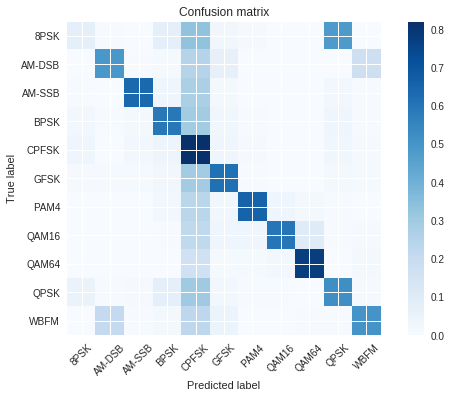

In [ ]:
classes = mods
test_Y_hat = loaded_model.predict(formatedData_test_2D, batch_size=1024)
conf = np.zeros([len(classes),len(classes)])
confnorm = np.zeros([len(classes),len(classes)])
formatedData_test_2D=np.array(formatedData_test_2D)
labels_test_matrix=np.array(labels_test_matrix)
for i in range(0,formatedData_test_2D.shape[0]):
    
    j = list(labels_test_matrix[i,:]).index(1)
    k = int(np.argmax(test_Y_hat[i,:]))
    conf[j,k] = conf[j,k] + 1

for i in range(0,len(classes)):
    confnorm[i,:] = conf[i,:] / np.sum(conf[i,:])
plot_confusion_matrix(confnorm, labels=classes)


In [ ]:
print(np.array(labels_test2).shape)
test_data = np.hstack((formatedData_test_2D,labels_test2))
print(test_data.shape)
print(labels_test_matrix.shape)
test_labels = np.hstack((labels_test_matrix,labels_test2))
print(test_data[ np.where(test_data[:,257] == str(18)) ].shape )

(8060, 2)
(8060, 258)
(8060, 11)
(403, 258)


-20
(403, 258)
403
(403, 256)
SNR:  -20  Overall Accuracy:  0.14640198511166252
-18
(403, 258)
403
(403, 256)
SNR:  -18  Overall Accuracy:  0.15632754342431762
-16
(403, 258)
403
(403, 256)
SNR:  -16  Overall Accuracy:  0.15384615384615385
-14
(403, 258)
403
(403, 256)
SNR:  -14  Overall Accuracy:  0.17121588089330025
-12
(403, 258)
403
(403, 256)
SNR:  -12  Overall Accuracy:  0.17369727047146402
-10
(403, 258)
403
(403, 256)
SNR:  -10  Overall Accuracy:  0.19602977667493796
-8
(403, 258)
403
(403, 256)
SNR:  -8  Overall Accuracy:  0.36476426799007444
-6
(403, 258)
403
(403, 256)
SNR:  -6  Overall Accuracy:  0.4739454094292804
-4
(403, 258)
403
(403, 256)
SNR:  -4  Overall Accuracy:  0.5955334987593052
-2
(403, 258)
403
(403, 256)
SNR:  -2  Overall Accuracy:  0.6972704714640199
0
(403, 258)
403
(403, 256)
SNR:  0  Overall Accuracy:  0.7692307692307693
2
(403, 258)
403
(403, 256)
SNR:  2  Overall Accuracy:  0.890818858560794
4
(403, 258)
403
(403, 256)
SNR:  4  Overall Accuracy:  0.8808

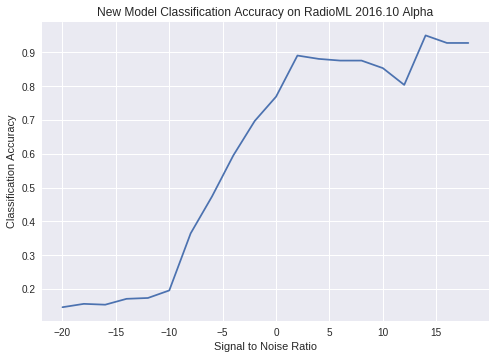

In [ ]:
test_data = np.hstack((formatedData_test_2D,labels_test2))
test_labels = np.hstack((labels_test_matrix,labels_test2))
classes=mods
acc = {}
formatedData_test_2D = np.array(formatedData_test_2D)
labels_test = np.array(labels_test)
accuracies=[]
for snr in snrs:
  # extract classes @ SNR
  print(snr)
  test_X_i = test_data[ np.where(test_data[:,257] == str(snr)) ]
  
  print(test_X_i.shape)
  test_Y_i = test_labels[np.where(test_labels[:,12] ==str(snr))]
  print(len(test_Y_i))

  # estimate classes
  test_X_i = np.delete(np.array(test_X_i) , 257 , axis=1)
  test_X_i = np.delete(np.array(test_X_i) , 256 , axis=1)
  print(test_X_i.shape)
  test_Y_i_hat = loaded_model.predict(test_X_i)
  conf = np.zeros([len(classes),len(classes)])
  confnorm = np.zeros([len(classes),len(classes)])

  for i in range(0,test_X_i.shape[0]):
    j = list(test_Y_i[i,:]).index('1')
    k = int(np.argmax(test_Y_i_hat[i,:]))
    conf[j,k] = conf[j,k] + 1

  for i in range(0,len(classes)):
    confnorm[i,:] = conf[i,:] / np.sum(conf[i,:])

  #plt.figure()
  #plot_confusion_matrix(confnorm, labels=classes, title="ConvNet Confusion Matrix (SNR=%d)"%(snr))
  cor = np.sum(np.diag(conf))
  ncor = np.sum(conf) - cor
  print ("SNR: ",snr, " Overall Accuracy: ", cor / (cor + ncor) )
  acc[snr] = 1.0 * cor / (cor + ncor)
  accuracies.append(1.0 * cor / (cor + ncor))
  


# Plot accuracy curve
plt.plot(snrs, accuracies)
plt.xlabel("Signal to Noise Ratio")
plt.ylabel("Classification Accuracy")
plt.title("New Model Classification Accuracy on RadioML 2016.10 Alpha")
plt.show()
